In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import *
import numpy as np
from sklearn.model_selection import train_test_split



In [2]:
import statsmodels.api as sn
from sklearn.metrics import *
data=pd.read_csv("C:\\ML\\loan prediction.csv")

data.isnull().sum()

# for categorical missing value mode is done

data['Gender'].fillna(data['Gender'].mode()[0],inplace=True)
data['Married'].fillna(data['Married'].mode()[0],inplace=True)
data['Dependents'].fillna(data['Dependents'].mode()[0],inplace=True)
data['Self_Employed'].fillna(data['Self_Employed'].mode()[0],inplace=True)
data['Credit_History'].fillna(data['Credit_History'].mode()[0],inplace=True)
data['Loan_Amount_Term'].fillna(data['Loan_Amount_Term'].mode()[0],inplace=True)

# for numerical mean and median is done

data['LoanAmount'].fillna(data['LoanAmount'].median(),inplace=True)

data.isnull().sum()

# dummy variable

data1=data.iloc[:,1:-1]
data1=pd.get_dummies(data1,columns=['Gender','Married','Dependents','Education','Self_Employed','Credit_History','Property_Area'],drop_first=True)

x=data1.values
y=data.iloc[:,-1]

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=10)

from sklearn.ensemble import RandomForestClassifier
clf=RandomForestClassifier(n_estimators=100,max_depth=3,min_samples_leaf=5,random_state=10)  # automatically criterion=Gini , you can use criterion = entropy also
clf.fit(x_train,y_train)

y_pred=clf.predict(x_test)
print("tarin accuracy:" ,clf.score(x_train,y_train))
print("test accuracy", clf.score(x_test,y_test))

# confusion matrix
cm=confusion_matrix(y_test,y_pred,labels=['Y','N'])
cm


#crossvalidation

from sklearn.model_selection import cross_val_score
accuracy=cross_val_score(clf,x,y,cv=10)
print(round(accuracy.mean(),3))


# Gridsearch



tarin accuracy: 0.8108695652173913
test accuracy 0.8116883116883117
0.808


In [3]:
from sklearn.model_selection import GridSearchCV
Param_Grid={
    'n_estimators':[50,100,200],
    'max_depth':[3,5,7],
    'min_samples_leaf':[2,5,10]}


In [4]:
CV_rfc=GridSearchCV(estimator=clf, param_grid=Param_Grid, cv=5)
CV_rfc.fit(x_train,y_train)


GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=3,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=5,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False, random_state=10,
                                     

In [5]:
print(CV_rfc.best_score_.round(5))
y_pred=CV_rfc.predict(x_test)
print("testing accuracy:",CV_rfc.score(x_test,y_test))
print(CV_rfc.best_params_)



0.81087
testing accuracy: 0.7987012987012987
{'max_depth': 7, 'min_samples_leaf': 2, 'n_estimators': 50}


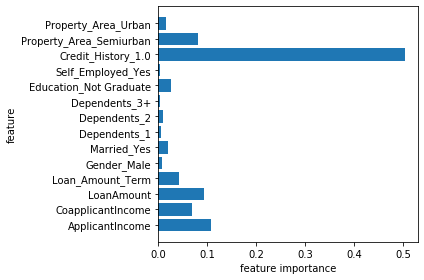

In [6]:
# Feature importance
import numpy as np
n_feature=data1.shape[1]
plt.barh(range(n_feature),clf.feature_importances_,align='center')
plt.yticks(np.arange(n_feature),data1.columns)
plt.xlabel('feature importance')
plt.ylabel('feature')
plt.tight_layout()



In [7]:
imp=list(zip(np.round(clf.feature_importances_,2),data1.columns))
imp.sort(reverse=True)
print(imp)

[(0.5, 'Credit_History_1.0'), (0.11, 'ApplicantIncome'), (0.09, 'LoanAmount'), (0.08, 'Property_Area_Semiurban'), (0.07, 'CoapplicantIncome'), (0.04, 'Loan_Amount_Term'), (0.03, 'Education_Not Graduate'), (0.02, 'Property_Area_Urban'), (0.02, 'Married_Yes'), (0.01, 'Gender_Male'), (0.01, 'Dependents_2'), (0.01, 'Dependents_1'), (0.0, 'Self_Employed_Yes'), (0.0, 'Dependents_3+')]
